# Sample Models

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

RANDOM_SEED = 1

/Users/split/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [22]:
df = pd.read_csv('airline_delays.csv')

# drop arr_del15 - indicates if a flight was late (arrives 15 mins after CRS time)
# for classification task, use arr_del15
x_cols = df.drop(columns=['arr_del15', 'arr_delay']).columns

In [23]:
df.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'crs_dep_time',
       'dep_delay', 'dep_del15', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_delay', 'arr_del15', 'crs_elapsed_time', 'distance', 'origin_ca',
       'is_weekday', 'external_cause', 'max_temp', 'min_temp', 'avg_temp',
       'precip', 'avg_wind_spd', 'wsf2', 'fog', 'haze'],
      dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df[x_cols],
    df['arr_delay'],
    test_size=.25,
    random_state=RANDOM_SEED
)

## Linear Regression

In [25]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
lm.score(X_test, y_test)

0.9436316553776531

In [27]:
mean_squared_error(y_test, lm.predict(X_test))

85.28318596899868

In [28]:
pd.Series(lm.coef_, index=x_cols)

year                -1.670231
month               -0.159188
day_of_month         0.024959
day_of_week          0.156096
crs_dep_time        -0.001660
dep_delay            0.958752
taxi_out             0.905412
taxi_in              0.703889
crs_arr_time         0.000957
crs_elapsed_time    -0.384672
distance             0.043335
origin_ca           -3.096430
is_weekday           0.757055
external_cause       7.039264
max_temp            -0.150839
min_temp            -0.025297
avg_temp             0.083077
precip              14.348275
avg_wind_spd         0.017874
wsf2                 0.024720
fog                  0.239446
haze                -0.053104
dtype: float64

#### Checking residuals

mean: 0.07664027496421752
sum: 1919.7622475786848


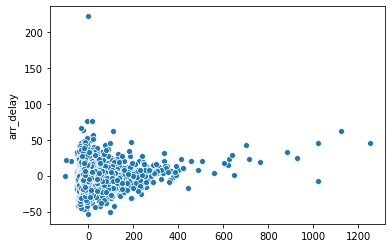

In [29]:
residuals = y_test - lm.predict(X_test)

print('mean:', np.mean(residuals))
print('sum:', np.sum(residuals))

sns.scatterplot(lm.predict(X_test), residuals);

----
## Ridge Regression

In [10]:
alphas = 10**np.linspace(10,0,num=50)*0.5

In [11]:
ridge = Ridge(fit_intercept=True, random_state=RANDOM_SEED)

ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [12]:
ridge.score(X_test, y_test)

0.9459886519505721

In [13]:
mean_squared_error(y_test, ridge.predict(X_test))

81.71713877702811

In [14]:
pd.Series(ridge.coef_, index=x_cols)

year                -1.100290
month               -0.102489
day_of_month         0.026448
day_of_week          0.150661
crs_dep_time        -0.001463
dep_delay            0.977079
dep_del15           -8.678553
taxi_out             0.852845
taxi_in              0.668045
crs_arr_time         0.001000
crs_elapsed_time    -0.376919
distance             0.042504
origin_ca           -3.144716
is_weekday           0.697816
external_cause      12.297375
max_temp            -0.149113
min_temp            -0.010770
avg_temp             0.079470
precip              13.791513
avg_wind_spd         0.027098
wsf2                 0.018869
fog                  0.246394
haze                -0.063867
dtype: float64

In [15]:
# Ridge regression w/ cross validation
ridgecv = RidgeCV(
    alphas=alphas,
    scoring='neg_mean_squared_error',
    fit_intercept=True,
    cv=10
)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.12527596e+09, 1.95346997e+09, 1.22102655e+09,
       7.63208984e+08, 4.77047738e+08, 2.98181166e+08, 1.86379686e+08,
       1.16497591e+08, 7.28174239e+07, 4.55149089e+07, 2.84493301e+07,
       1.77824015e+07, 1.11149824e+07, 6.94747747e+06, 4.34255687e+06,
       2.71433772e+06, 1.69661089e+06, 1.06047544e+06, 6.62855683e+05,
       4.14321386e+05, 2.58973734e+0...
       9.65348864e+03, 6.03396320e+03, 3.77156003e+03, 2.35743318e+03,
       1.47352585e+03, 9.21034985e+02, 5.75697700e+02, 3.59842837e+02,
       2.24921633e+02, 1.40588435e+02, 8.78755312e+01, 5.49270571e+01,
       3.43324423e+01, 2.14596713e+01, 1.34134790e+01, 8.38416468e+00,
       5.24056567e+00, 3.27564278e+00, 2.04745753e+00, 1.27977396e+00,
       7.99929360e-01, 5.00000000e-01]),
        cv=10, scoring='neg_mean_squared_error')

In [16]:
ridge2 = Ridge(alpha=ridgecv.alpha_, fit_intercept=True)
ridge2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [17]:
ridge2.score(X_test, y_test)

0.9459888616912955

In [18]:
mean_squared_error(y_test, ridge2.predict(X_test))

81.7168214471999

In [19]:
pd.Series(ridge2.coef_, index=x_cols)

year                -1.100242
month               -0.102423
day_of_month         0.026442
day_of_week          0.150662
crs_dep_time        -0.001463
dep_delay            0.977079
dep_del15           -8.681004
taxi_out             0.852815
taxi_in              0.668021
crs_arr_time         0.001000
crs_elapsed_time    -0.376915
distance             0.042504
origin_ca           -3.144878
is_weekday           0.697705
external_cause      12.300081
max_temp            -0.149035
min_temp            -0.010754
avg_temp             0.079401
precip              13.813876
avg_wind_spd         0.027232
wsf2                 0.018781
fog                  0.245659
haze                -0.063996
dtype: float64

#### Checking residuals

mean: 0.08284186110662341
sum: 2075.10577885981


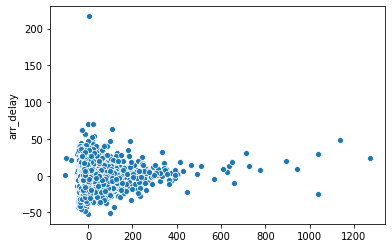

In [20]:
residuals = y_test - ridge2.predict(X_test)
print('mean:', np.mean(residuals))
print('sum:', np.sum(residuals))

sns.scatterplot(ridge2.predict(X_test), residuals)

---

## Lasso

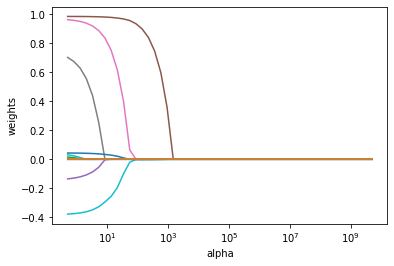

In [236]:
lasso = Lasso(max_iter=10000, fit_intercept=True, random_state=RANDOM_SEED)

coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [237]:
lassocv = LassoCV(
    alphas=None, 
    cv=10, 
    max_iter=10000, 
    fit_intercept=True, 
    random_state=RANDOM_SEED
)

lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=1)

In [238]:
# assign cross-validated alpha value to the initial lasso model
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.4413645974313765, max_iter=10000, random_state=1)

In [239]:
lasso.score(X_test, y_test)

0.9390689033997178

In [240]:
mean_squared_error(y_test, lasso.predict(X_test))

92.18645815255697

In [241]:
pd.Series(lasso.coef_, index=x_cols)

year               -0.000000
month              -0.000000
day_of_month        0.002255
day_of_week         0.000000
crs_dep_time       -0.001291
dep_delay           0.986009
taxi_out            0.949764
taxi_in             0.614927
crs_arr_time        0.001044
crs_elapsed_time   -0.368919
distance            0.042189
origin_ca          -0.000000
is_weekday          0.000000
external_cause      0.000000
max_temp           -0.118606
min_temp           -0.000000
avg_temp           -0.000000
precip              0.000000
avg_wind_spd        0.000000
wsf2                0.008484
fog                 0.000000
haze                0.000000
dtype: float64

mean: 0.09282923722747621
sum: 2325.279563311059


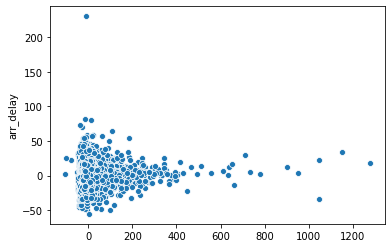

In [242]:
residuals = y_test - lasso.predict(X_test)
print('mean:', np.mean(residuals))
print('sum:', np.sum(residuals))

sns.scatterplot(lasso.predict(X_test), residuals)